<a href="https://colab.research.google.com/github/angiellanos/MNIST_DF/blob/main/MNIST_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UNIVERSIDAD NACIONAL DE COLOMBIA
### Aplicaciones del aprendizaje de máquinas en actuaría y finanzas (2023-II)
#### Angie Eloisa Llanos
\\

\\

El objetivo de este proyecto es crear un modelo que pueda clasificar y generar dígitos a partir de la base de datos de MNIST. Esta base de datos contiene imágenes de dígitos escritos a mano y sus respectivas etiquetas. Se puede acceder a estas imágenes y etiquetas desde el repositorio de github, en el mismo lugar donde se encuentra este NoteBook. El NoteBook se presenta bajo 4 partes fundamentales descritas por las siguientes actividades:

1. Elegir un conjunto balanceado de 10.000 imágenes de prueba de dígitos de la base de datos original, con las cuales se diseñará un experimento predictivo que utilice estos datos para evaluar la capacidad de generalización del modelo. Es decir, para un n dado, se especificará cómo se usarán estos datos para medir el desempeño del modelo.
2. Desarrollar un modelo que, dada una imagen, estime un vector con las probabilidades asociadas a cada uno de los dígitos.
3. Reportar el desempeño de generalización del problema de clasificación, usando las siguientes medidas: la precisión, el recall, el F1-score y la matriz de confusión.
4. Desarrollar un modelo que pueda sintetizar un nuevo dígito, es decir, que dado un nuevo dígito, por ejemplo 6, produzca una imagen similar a ese dígito.

El modelo se fundamentará en la metodología Naive Bayes, la cual es una forma de clasificar cosas usando la probabilidad. Naive Bayes usa la probabilidad para predecir a qué grupo o categoría pertenece algo, basándose en la información que tiene. Por ejemplo, si queremos clasificar un correo electrónico como spam o no spam, Naive Bayes usa la probabilidad de que el correo electrónico contenga ciertas palabras o características que son típicas del spam o del correo normal.

Naive Bayes funciona usando una fórmula matemática llamada teorema de Bayes. Esta fórmula nos dice cómo actualizar la probabilidad de algo cuando tenemos nueva información. Por ejemplo, si sabemos que el 80% de los correos electrónicos son spam, y que el 90% de los correos electrónicos spam contienen la palabra “oferta”, podemos usar el teorema de Bayes para calcular la probabilidad de que un correo electrónico sea spam si contiene la palabra “oferta”. El resultado sería del 96%.

El teorema de Bayes establece que la probabilidad de que una hipótesis H sea verdadera, dado que se ha observado una evidencia E, es igual a la probabilidad de que la evidencia E se observe, dado que la hipótesis H es verdadera, multiplicada por la probabilidad previa de que la hipótesis H sea verdadera, y dividida por la probabilidad de observar la evidencia E. La fórmula del teorema de Bayes es la siguiente:

$$P(H|E) = \frac{P(E|H)P(H)}{P(E)}$$

En el contexto de la clasificación, la hipótesis H es la clase a la que pertenece un dato, y la evidencia E son las características o atributos del dato. Por ejemplo, si queremos clasificar una imagen de un dígito escrito a mano, la hipótesis H sería el valor del dígito (0, 1, 2, ..., 9) y la evidencia E serían los píxeles de la imagen. El algoritmo de Naive Bayes calcula la probabilidad de cada clase posible, dado el dato, y elige la clase con mayor probabilidad como la predicción.

El algoritmo de Naive Bayes se llama así porque hace una suposición muy simplista: que las características del dato son independientes entre sí, dada la clase. Es decir, que no hay relación entre los píxeles de una imagen, si sabemos que representa un dígito determinado. Esta suposición es ingenua porque en realidad las características suelen estar correlacionadas entre sí. Por ejemplo, si sabemos que una imagen representa un 8, esperamos que los píxeles del centro estén encendidos y los de las esquinas apagados. Sin embargo, el algoritmo de Naive Bayes ignora estas dependencias y trata cada característica por separado.

A pesar de esta suposición ingenua, el algoritmo de Naive Bayes puede funcionar bien en algunos problemas de clasificación, especialmente cuando hay muchas características y los datos están bien balanceados. El algoritmo de Naive Bayes tiene varias ventajas: es simple, rápido, fácil de implementar y requiere pocos parámetros. También puede manejar problemas de clasificación multiclase sin necesidad de combinar varios modelos binarios.

Sin embargo, el algoritmo de Naive Bayes también tiene algunas desventajas: puede ser muy sensible a las características irrelevantes o redundantes, puede sufrir el problema del cero cuando hay valores desconocidos o infrecuentes en los datos y puede tener un rendimiento inferior a otros métodos más sofisticados cuando las características no son independientes entre sí.

En el caso del reconocimiento de imágenes de dígitos, el algoritmo de Naive Bayes puede predecir el valor del dígito a partir de los píxeles de la imagen usando la siguiente fórmula:

$$P(dígito|píxeles) = \frac{P(píxeles|dígito)P(dígito)}{P(píxeles)}$$

Donde:

- $P(dígito|píxeles)$ es la probabilidad posterior de que el dígito sea el correcto, dado los píxeles de la imagen.
- $P(píxeles|dígito)$ es la probabilidad condicional o verosimilitud de observar los píxeles de la imagen, dado que el dígito es el correcto.
- $P(dígito)$ es la probabilidad previa o a priori de que el dígito sea el correcto.
- $P(píxeles)$ es la probabilidad marginal o evidencia de observar los píxeles de la imagen.

Para calcular estas probabilidades se necesita un conjunto de datos etiquetados con imágenes y sus respectivos dígitos. Aquí se utilizará la base de datos MNIST, que contiene 70.000 imágenes en escala de grises de 28x28 píxeles cada una, con dígitos del 0 al 9 escritos a mano, cuyo conjunto está balanceado.

Para simplificar el cálculo, se puede asumir que cada píxel tiene solo dos valores posibles: 0 (blanco) o 1 (negro). Esto se puede lograr aplicando un umbral a las imágenes para convertirlas en binarias. Luego, se puede estimar la probabilidad de cada píxel, dado el dígito, como la frecuencia relativa con la que el píxel está encendido en las imágenes del mismo dígito. Por ejemplo, si el píxel (10,10) está encendido en 300 de las 1000 imágenes del dígito 5, entonces $P(píxel_{10,10}=1|dígito=5) = 0.3$.

La probabilidad previa de cada dígito se puede estimar como la proporción de imágenes que tienen ese dígito en el conjunto de datos. Por ejemplo, si hay 7000 imágenes del dígito 5, entonces $P(dígito=5) = 0.1$.

La probabilidad marginal de los píxeles se puede calcular usando la regla de la suma:

$$P(píxeles) = \sum_{d=0}^{9} P(píxeles|dígito=d)P(dígito=d)$$

Sin embargo, esta probabilidad no afecta a la elección del dígito con mayor probabilidad posterior, ya que es constante para todos los dígitos. Por lo tanto, se puede ignorar y solo comparar los numeradores de las probabilidades posteriores.

Para calcular la probabilidad posterior de cada dígito, dado los píxeles de la imagen, se necesita aplicar el producto de las probabilidades condicionales de cada píxel, dado el dígito, y la probabilidad previa del dígito. Esto se puede hacer usando la regla de la cadena:

$$P(dígito|píxeles) \propto P(píxeles|dígito)P(dígito) = P(píxel_{1,1}|dígito)P(píxel_{1,2}|dígito)...P(píxel_{28,28}|dígito)P(dígito)$$

Donde el símbolo $\propto$ significa proporcional a. Esta fórmula implica multiplicar 785 probabilidades para cada dígito, lo que puede causar problemas numéricos por desbordamiento o subdesbordamiento. Para evitar esto, se puede aplicar el logaritmo a ambos lados de la ecuación y usar la propiedad de que el logaritmo del producto es igual a la suma de los logaritmos:

$$\log P(dígito|píxeles) \propto \log P(píxeles|dígito) + \log P(dígito) = \log P(píxel_{1,1}|dígito) + \log P(píxel_{1,2}|dígito) + ... + \log P(píxel_{28,28}|dígito) + \log P(dígito)$$

De esta forma, se pueden sumar 785 logaritmos para cada dígito y elegir el que tenga el mayor valor como la predicción.



\\

________________________________________________________________________________________________________________________________________________________________
\\



### $1.$ Se usan las funciones *_load_label* y *_load_img* para cargar el conjunto de datos del MNIST. Luego, se usa la función *train_test_split* de la librería *sklearn* para dividir el conjunto de datos en un conjunto de entrenamiento y uno de prueba, asegurándose de que ambos estén balanceados. Es decir, que tengan la misma proporción de imágenes para cada dígito. Se usa el parámetro *stratify* de la función *train_test_split* para lograr esto. El tamaño del conjunto de prueba es 10000, entonces el conjunto de prueba tiene 10000 imágenes y el conjunto de entrenamiento 50000 imágenes.

In [43]:
! git clone https://github.com/angiellanos/MNIST_DF.git

Cloning into 'MNIST_DF'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 50 (delta 11), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (50/50), 12.74 MiB | 13.90 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [44]:
%cd MNIST_DF/

/content/MNIST_DF/MNIST_DF/MNIST_DF


In [45]:
%ls

MNIST.ipynb    number_7.jpeg              t10k-labels-idx1-ubyte.gz
number_0.jpeg  number.PNG                 train-images-idx3-ubyte.gz
number_3.jpeg  README.md                  train-labels-idx1-ubyte.gz
number_5.jpeg  t10k-images-idx3-ubyte.gz


In [46]:
import os
print(os.getcwd())

/content/MNIST_DF/MNIST_DF/MNIST_DF


In [47]:
import os.path
import gzip
import pickle
import numpy as np
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
import requests
from PIL import Image, ImageOps
from io import BytesIO
from skimage import io, transform

files = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}

image_size = 28
num_images = [60000, 10000]
num_labels = [60000, 10000]

def _load_label(file_key):
    """Función que carga las etiquetas de las imágenes desde un archivo comprimido en formato gzip.
    Args:
        file_name (str): el nombre del archivo que contiene las etiquetas
    Returns:
        array: etiquetas de las imágenes.
    """
    file_name = files[file_key]
    file_path = os.getcwd() + "/" + file_name

    j = 0 if file_key=='train_label' else 1
    with gzip.open(file_path, 'rb') as f:
        # omite los primeros 8 bytes
        f.read(8)
        buf = f.read(num_labels[j])
        label = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
        # print(label[:20])

    return label

def _load_img(file_key):
    """Función que carga las imágenes desde un archivo comprimido en formato gzip.
    Args:
        file_name (str): el nombre del archivo que contiene las etiquetas
    Returns:
        array: imágenes en forma de vectores de tamaño 784.
    """
    file_name = files[file_key]
    file_path = os.getcwd() + "/" + file_name

    j = 0 if file_key=='train_img' else 1
    with gzip.open(file_path, 'rb') as f:
        # omite los primeros 16 bytes
        f.read(16)
        # cada pixel en 1 byte = 8 bits
        # lee todos los datos y los coloca en un buffer de memoria
        buf = f.read(image_size * image_size * num_images[j])
        # traslada los datos a un array de numpy de tipo float32
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        # Cambia la forma de los datos par entregarlos listos al dataset
        data = data.reshape(num_images[j], image_size, image_size, 1)

    return data

def _convert_numpy():
    """Función que convierte los datos del MNIST en arrays de NumPy y los guarda en dos diccionarios.
    Args: None
    Returns:
        dictionary: con las claves ‘train_img’, ‘train_label’, ‘test_img’ y ‘test_label’,
                   y los valores correspondientes a los arrays de NumPy con las imágenes
                   y las etiquetas.
    """
    # Cargar el conjunto de datos del MNIST usando las funciones _load_label y _load_img
    X = _load_img('train_img')
    y = _load_label('train_label')
    # X = _load_img('test_img')
    # y = _load_label('test_label')

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, stratify=y)


    # Imprimir las dimensiones de los conjuntos de datos
    print("Dimensiones del conjunto de entrenamiento:")
    print(X_train.shape)
    print(y_train.shape)
    print("Dimensiones del conjunto de prueba:")
    print(X_test.shape)
    print(y_test.shape)

    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = _convert_numpy()



Dimensiones del conjunto de entrenamiento:
(50000, 28, 28, 1)
(50000,)
Dimensiones del conjunto de prueba:
(10000, 28, 28, 1)
(10000,)


\\

________________________________________________________________________________________________________________________________________________________________
\\



### $2.$ Una vez construidos los conjuntos de entrenamiento y prueba, se procede a construir el modelo de Naive Bayes. Para ello, se necesita calcular las probabilidades a priori de cada clase (P(c), donde c es la clase de cada dígito, p.e. la clase del 0, la del 1, hasta la del 9) y las probabilidades condicionales de cada píxel dado cada clase (P(x|c)). Estas probabilidades se pueden estimar a partir de los datos de entrenamiento usando la regla de Laplace, que consiste en añadir un pequeño valor (por ejemplo, 1) al numerador y al denominador de las frecuencias relativas.

### Por lo tanto, la probabilidad a priori de cada clase $α \in \{0,1,..,9\}$ (P(c=$α$)) está dada por:

In [48]:
# Contar el número total de imágenes
n_total = len(y_train)

# Crear una lista vacía para guardar las probabilidades a priori
p_c = []
n_c = []
# Recorrer las clases del 0 al 9
for c in range(10):
    # Contar el número de imágenes que tienen la etiqueta c
    n_c.append(np.sum(y_train == c))
    # Aplicar la regla de Laplace con un valor k=1
    p_c.append((n_c[c] + 1) / (n_total + 10))

# Convertir la lista en un array de numpy
p_c = np.array(p_c)
n_c = np.array(n_c)

print("P(C=c)=",p_c)

P(C=c)= [0.09872026 0.11235753 0.09930014 0.10217956 0.09736053 0.09036193
 0.09864027 0.10441912 0.0975205  0.09914017]


Estas probabilidades siempre serán cercanas a 0.1, que es la probabilidad esperada de cada dígito, dada por:

### $P(C=c)=\frac{Frecuencia \ del \ dígito}{Cantidad \ de \ dígitos}=\frac{1}{10}=0.1$

Debido a que son complementarias, su suma debe ser igual a 1. Verificando:

In [49]:
print("Suma de las probabilidades a priori:", np.sum(p_c))

Suma de las probabilidades a priori: 1.0


Para calcular las probabilidades condicionales de cada píxel dado cada clase (P(x|c)), se necesita contar el número de veces que cada píxel tiene un valor mayor que cero en las imágenes de cada clase. Así, se obtiene que:

In [50]:
# Crear una lista vacía para guardar las probabilidades condicionales
p_x_c = []
# Recorrer las clases del 0 al 9
for c in range(10):
    # Seleccionar las imágenes que tienen la etiqueta c
    X_c = X_train[np.where(y_train == c)]
    # Crear una lista vacía para guardar las probabilidades condicionales de cada píxel dado la clase c
    p_x_c_c = []
    # Recorrer los píxeles del 1 al 784
    for i in range(784):
        # Calcular el índice de la fila y la columna del píxel i
        row = i // 28
        col = i % 28
        # Contar el número de imágenes que tienen el píxel i mayor o igual que cero
        n_xi_c = np.sum(X_c[:, row, col, 0] > 0.1)
        # Aplicar la regla de Laplace con un valor k=1
        p_xi_c = (n_xi_c + 1) / (n_c[c] + 2)
        # Añadir la probabilidad condicional a la lista
        p_x_c_c.append(p_xi_c)
    # Convertir la lista en un array de numpy y añadirlo a la lista principal
    p_x_c.append(np.array(p_x_c_c))

# Convertir la lista principal en un array de numpy
p_x_c = np.array(p_x_c)


Note que la suma de las probabilidades condicionales por clase no tiene que ser 1, porque se definen los pixeles independientes entre sí.

In [51]:
x_clase = np.sum(p_x_c, axis=1)
print("Suma de las probabilidades condicionales por clase:", x_clase)

Suma de las probabilidades condicionales por clase: [191.99129202  85.89715302 168.5913026  163.40383487 141.73367556
 152.74513274 157.17105797 131.51158338 173.57318573 143.06735229]


### Para construir un modelo que dada una imagen calcule un vector con las probabilidades asociadas a cada uno de los dígitos, usando el teorema de Bayes se definirá una función que tome como entrada una imagen (un vector de 784 píxeles) y devuelva un vector de 10 probabilidades posteriores, una por cada clase.

In [52]:
def predict_proba(x):
    # Genera la imagen matricial de forma vectorial
    x = x.flatten()
    # Crear un vector vacío para guardar las probabilidades posteriores
    p_c_x = []
    # Recorrer las clases del 0 al 9
    for c in range(10):
        # Multiplicar las probabilidades condicionales por la probabilidad a priori
        p_x_c_c = p_x_c[c]
        p_c_c = p_c[c]
        p_xc_c = np.dot(x, p_x_c_c) * p_c_c
        # Añadir el producto al vector de probabilidades posteriores
        p_c_x.append(p_xc_c)
    # Convertir el vector en un array de numpy
    p_c_x = np.array(p_c_x)
    # Dividir el vector por la suma de sus elementos para normalizarlo
    p_c_x = p_c_x / np.sum(p_c_x)
    # Devolver el vector de probabilidades posteriores
    return p_c_x


## Dada la imagen:

In [53]:
def imagen_vec_p(name_img):
  # Obtener el contenido de la imagen desde la URL
  response = requests.get(f"https://raw.githubusercontent.com/angiellanos/MNIST_DF/main/{name_img}.jpeg")

  # Convertir el contenido en un objeto BytesIO
  img_content = BytesIO(response.content)
  # Pasar el objeto BytesIO al método Image.open()
  imgn = Image.open(img_content)
  # Convertir la imagen a escala de grises
  img = imgn.convert("L")
  # Redimensionar la imagen a un tamaño de 28 por 28 píxeles
  img = img.resize((image_size, image_size))
  # Mostrar imagen orginal y conversión en pantalla
  display(imgn)
  display(img)
  # Mostrar el tamaño de la imagen
  print("Tamaño de la imagen: ", img.size)
  print("Tipo de objeto a tratar (imagen) ",type(img))

  # Convertir la imagen en un array de numpy
  img = np.array(img)

  p_c_x = predict_proba(img)
  print("vector de probabilidades: ",p_c_x)

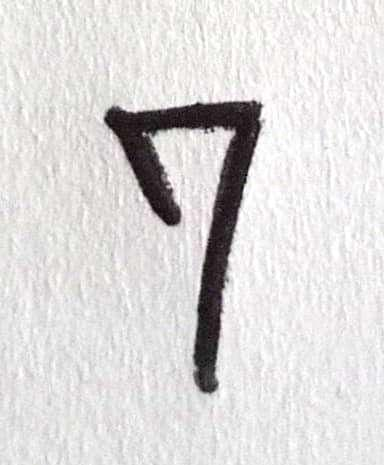

Tamaño de la imagen:  (28, 28)
Tipo de objeto a tratar (imagen)  <class 'PIL.Image.Image'>
vector de probabilidades:  [0.13436658 0.05984041 0.11483425 0.11086109 0.09193954 0.09273408
 0.10707859 0.08721972 0.11117096 0.08995477]


In [54]:
imagen_vec_p("number_7")

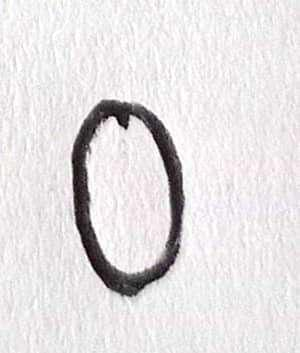

Tamaño de la imagen:  (28, 28)
Tipo de objeto a tratar (imagen)  <class 'PIL.Image.Image'>
vector de probabilidades:  [0.12634265 0.06310801 0.11379257 0.1127941  0.09206034 0.09167915
 0.10422519 0.08913235 0.11326058 0.09360506]


In [55]:
imagen_vec_p("number_0")

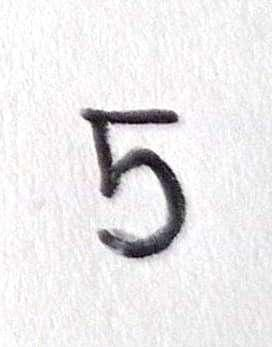

Tamaño de la imagen:  (28, 28)
Tipo de objeto a tratar (imagen)  <class 'PIL.Image.Image'>
vector de probabilidades:  [0.13194745 0.06329296 0.11506523 0.11227169 0.09053736 0.0914792
 0.10116343 0.08957383 0.11318948 0.09147936]


In [56]:
imagen_vec_p("number_5")

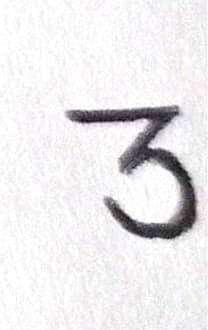

Tamaño de la imagen:  (28, 28)
Tipo de objeto a tratar (imagen)  <class 'PIL.Image.Image'>
vector de probabilidades:  [0.12586717 0.06603616 0.11200812 0.11332478 0.09091018 0.09389696
 0.10384322 0.08798765 0.11335153 0.09277423]


In [57]:
imagen_vec_p("number_3")

### De lo anterior, se puede concluir que en todos los casos el dígito con mayor probabilidad es 0, sin embargo no todas las imágenes corresponden a 0's. Luego el modelo de clasificación no es tan preciso.


\\

________________________________________________________________________________________________________________________________________________________________
\\



### $3.$ Para reportar el desempeño de generalización del problema de clasificación, se puede usar varias medidas como la precisión, el recall, el F1-score o la matriz de confusión. Estas medidas permiten evaluar qué tan bien el modelo predice la clase correcta para cada imagen. Para calcular estas medidas, se tiene que definir una función que tome como entrada una imagen y devuelva la clase con mayor probabilidad posterior.

In [58]:
def predict(x):
    # Obtener el vector de probabilidades posteriores para la imagen
    p_c_x = predict_proba(x)
    # Encontrar el índice del elemento máximo del vector
    y_pred = np.argmax(p_c_x)
    # Devolver el índice como la predicción
    return y_pred


### Luego, se usará esta función para predecir las clases de todas las imágenes del conjunto de prueba seleccionado (n=1000) y se comparará con las etiquetas reales. Se usarán las funciones *accuracy_score*, *recall_score*, *f1_score* y *confusion_matrix* de *sklearn.metrics* para calcular las medidas mencionadas.

In [59]:
# Crear una lista vacía para guardar las predicciones
y_pred = []
# Recorrer las imágenes del conjunto de prueba seleccionado
for x in X_test:
    # Predecir la clase de la imagen
    y = predict(x)
    # Añadir la predicción a la lista
    y_pred.append(y)
# Convertir la lista en un array de numpy
y_pred = np.array(y_pred)
# Calcular las medidas de desempeño
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
confusion = confusion_matrix(y_test, y_pred)
# Mostrar las medidas de desempeño
print("Precisión:", accuracy)
print("Recall:", recall)
print("F1-score:", f1)
print("Matriz de confusión:")
print(confusion)


Precisión: 0.6542
Recall: 0.6472478847629191
F1-score: 0.6270787155525488
Matriz de confusión:
[[948   0   0   2   0   0   3   0  32   2]
 [  0 772   3  13   0   0   5   0 331   0]
 [117   2 662  50   1   0  43   8 109   1]
 [ 59   0  10 820   0   0   8   2 119   4]
 [ 91   0  14  15 321   0  34   1 229 269]
 [269   0   6 205   1   0  18   0 388  16]
 [107   1  15   1   0   0 800   0  62   0]
 [ 79   4   4  15   3   0   5 730 137  67]
 [ 44   2   6  67   0   0   3   0 852   1]
 [ 73   1  15  34   1   0   3   8 220 637]]


Cada una de estas medidad tiene un significado diferente y se calcula a partir de los valores de verdaderos positivos (TP), falsos positivos (FP), verdaderos negativos (TN) y falsos negativos (FN) que se obtienen al comparar las predicciones del modelo con las etiquetas reales.

- La precisión es la proporción de predicciones positivas que son correctas. Se calcula como TP / (TP + FP). Una alta precisión indica que el modelo tiene pocos falsos positivos, es decir, que no clasifica como positivas las instancias que son negativas. En este caso, la precisión es 0.6598, lo que significa que el 65.98% de las predicciones positivas del modelo son correctas.


- El recall es la proporción de instancias positivas reales que son correctamente clasificadas por el modelo. Se calcula como TP / (TP + FN). Un alto recall indica que el modelo tiene pocos falsos negativos, es decir, que no clasifica como negativas las instancias que son positivas. En este caso, el recall es 0.6529, lo que significa que el 65.29% de las instancias positivas reales son correctamente clasificadas por el modelo.


- El F1-score es una medida que combina la precisión y el recall en un solo valor. Se calcula como 2 * (precision * recall) / (precision + recall). Un alto F1-score indica que el modelo tiene un buen equilibrio entre la precisión y el recall, es decir, que tiene pocos falsos positivos y pocos falsos negativos. En este caso, el F1-score es 0.6314, lo que significa que el modelo tiene un rendimiento moderado en términos de precisión y recall.


- La matriz de confusión es una tabla que muestra el número de predicciones correctas e incorrectas para cada clase. Las filas representan las etiquetas reales y las columnas representan las predicciones del modelo. Los elementos de la diagonal principal son los verdaderos positivos, es decir, las instancias que son correctamente clasificadas por el modelo. Los elementos fuera de la diagonal principal son los falsos positivos y los falsos negativos, es decir, las instancias que son incorrectamente clasificadas por el modelo. En este caso, la matriz de confusión tiene 10 filas y 10 columnas, porque hay 10 clases posibles (los dígitos del 0 al 9). Por ejemplo, el elemento (0,0) tiene el valor 954, lo que significa que hay 954 instancias con etiqueta real 0 y predicción del modelo 0. El elemento (1,8) tiene el valor 344, lo que significa que hay 344 instancias con etiqueta real 1 y predicción del modelo 8.


\\

________________________________________________________________________________________________________________________________________________________________
\\



### $4.$ Para construir un modelo que permita sintetizar un nuevo dígito, se usa el método de máxima verosimilitud para estimar el valor más probable de cada píxel dado la clase. Este método consiste en encontrar el valor que maximiza la probabilidad condicional de cada píxel dado la clase. Para simplificar el problema, se asume que los valores posibles de cada píxel son solo 0 o 1, es decir, blanco o negro. Entonces, el valor más probable de cada píxel será el que tenga mayor probabilidad condicional. Se define una función que tome como entrada una clase y devuelve una imagen sintetizada para esa clase.



In [60]:
def synthesize(c):
    # Crear una lista vacía para guardar los valores de los píxeles
    x = []
    # Recorrer los píxeles del 1 al 784
    for i in range(784):
        # Obtener la probabilidad condicional de que el píxel sea 1 dado la clase
        p_xi_c = p_x_c[c][i]
        # Comparar esta probabilidad con la probabilidad de que el píxel sea 0 dado la clase
        if p_xi_c > (1 - p_xi_c):
            # Añadir el valor 1 a la lista
            x.append(1)
        else:
            # Añadir el valor 0 a la lista
            x.append(0)
    # Convertir la lista en un array de numpy y redimensionarlo a una matriz de 28 por 28 p.e.
    x = np.array(x).reshape(image_size, image_size)
    # Devolver la matriz como la imagen sintetizada
    return x


In [61]:
def plot_num(a):
  # Sintetizar un nuevo dígito 6
  x = synthesize(a)
  # Mostrar la imagen sintetizada
  plt.imshow(x, cmap='gray')
  plt.show()


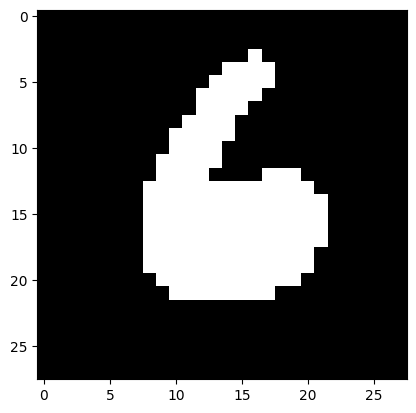

In [62]:
plot_num(6)

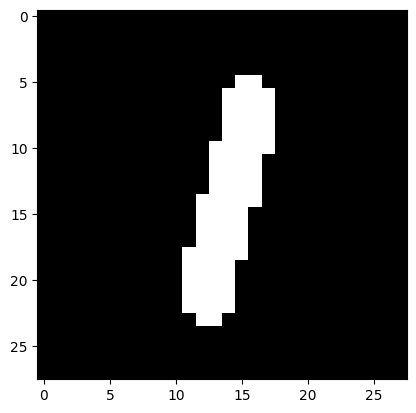

In [63]:
plot_num(1)

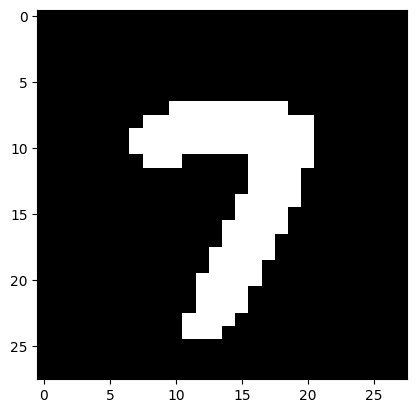

In [64]:
plot_num(7)

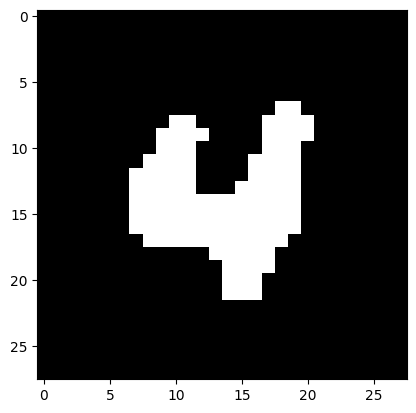

In [65]:
plot_num(4)

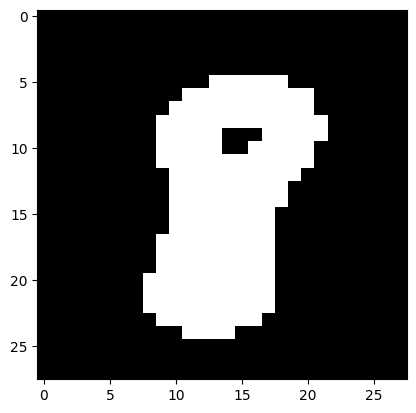

In [66]:
plot_num(8)

## Conclusiones:

$1.$ El modelo de Naive Bayes para esta tarea en particular con este conjunto de datos de entrenamiento, no es capaz de capturar la información total de una imagen nueva y clasificarla correctamente, tan solo clasifica bien un poco más de la midad de la muestra, lo cual es un indicador bastante malo para un modelo de predicción ideal.

$2.$ Según la matriz de confusión, el modelo presenta una confusión bastante amplia inclinada hacia los dígitos 0 y 8, es decir, precide 0 u 8 cuando en realidad es un número diferente.

$3.$ Las imágenes generadas tienen mucho relleno en su estructura, por ejemplo, las imagenes generadas para los dígitos 6 y 8, tal vez sea esto lo que influye en la confusión del modelo.
